## **Implementation**

In [46]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import PolynomialFeatures

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
os.chdir("/content/drive/MyDrive/LangTech/ML/ex02") # use the directory that contains your local dataset
!pwd

/content/drive/MyDrive/LangTech/ML/ex02


In [ ]:
heart = "/content/drive/MyDrive/LangTech/ML/ex02/heart.csv"

csv = pd.read_csv(heart)
columns = list(csv.columns.values)
data = csv.to_numpy()

input = data[:, :-1]
output = data[:, -1]

csv.head()

input = np.column_stack((np.ones((input.shape[0])), input)) # a column of ones for the bias term

In [6]:
X_train, X_test, y_train, y_test = train_test_split(input, output, test_size=0.1, random_state=10)

## **Logistic Regression**

In [32]:
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)

print("Coefficients:\t", lr.coef_)
print("Intercept:\t", lr.intercept_)

Coefficients:	 [[ 1.48958277e-04  1.26997976e-02 -1.56403234e+00  7.90422943e-01
  -2.04612197e-02 -5.89725227e-03  6.53160599e-03  2.11199584e-01
   2.68074519e-02 -8.27377444e-01 -4.25369348e-01  5.47105085e-01
  -8.73847413e-01 -8.11817175e-01]]
Intercept:	 [2.19756526]


Accuracy:	 0.8064516129032258


Text(113.9222222222222, 0.5, 'predicted label')

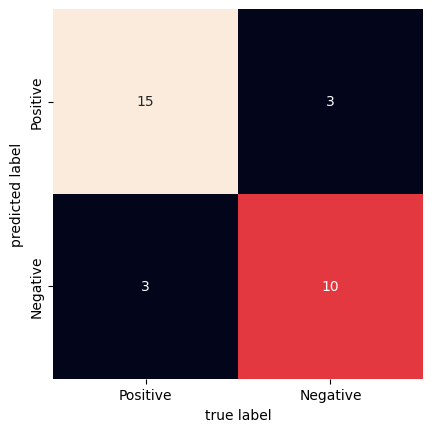

In [33]:
# Metrics

# Accuracy
print("Accuracy:\t", lr.score(X_test, y_test))


# Confusion Matrix
y_pred = lr.predict(X_test)
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.xlabel('true label')
plt.ylabel('predicted label')

In [9]:
# ========== BONUS 1 ==================
poly = PolynomialFeatures()
train_poly = poly.fit_transform(X_train, y_train)
test_poly = poly.fit_transform(X_test)

In [34]:
poly_lr = LogisticRegression(max_iter=10000)
poly_lr.fit(train_poly, y_train)

print('Coefficients Polynomial classifier:\n', poly_lr.coef_)

Coefficients Polynomial classifier:
 [[ 1.08694078e-04  1.08694078e-04  4.01607076e-03 -8.33916324e-04
  -1.15417174e-03 -6.27507923e-03 -2.51551820e-02  1.80829858e-04
  -2.02136888e-03  5.99983279e-02  1.24625554e-03 -1.67365000e-03
  -3.47002567e-04  1.03085007e-03  8.44490954e-04  1.08694078e-04
   4.01607076e-03 -8.33916324e-04 -1.15417174e-03 -6.27507923e-03
  -2.51551820e-02  1.80829858e-04 -2.02136888e-03  5.99983279e-02
   1.24625554e-03 -1.67365000e-03 -3.47002567e-04  1.03085007e-03
   8.44490954e-04  9.47010364e-04 -1.35405638e-02  1.09580160e-03
   3.57006994e-04  5.75889878e-04 -3.59995494e-02  9.73023254e-02
  -4.67716371e-03 -2.82781114e-03 -1.68123095e-02 -2.27547389e-02
   1.58507431e-02  1.86817584e-01 -8.33916324e-04 -1.84220396e-02
  -1.36266906e-02 -1.37891180e-02  4.44635234e-03 -8.60140166e-03
   2.51265287e-02  9.44805913e-03  5.38388784e-03 -1.24138139e-02
   5.83298359e-03  1.01770997e-02 -4.48264046e-02 -9.29035017e-05
  -5.62859382e-03  1.64691695e-02 -2.29

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy:	 0.8709677419354839


Text(113.9222222222222, 0.5, 'predicted label')

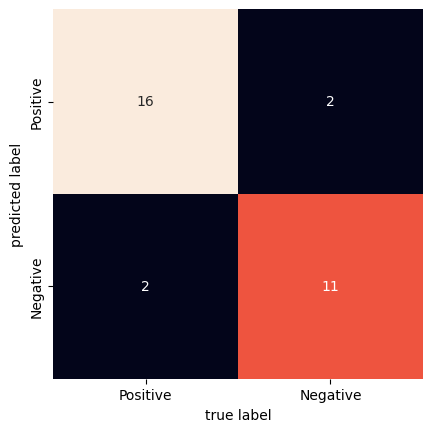

In [35]:
y_pred = poly_lr.predict(test_poly)

print("Accuracy:\t", accuracy_score(y_test, y_pred=y_pred))

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.xlabel('true label')
plt.ylabel('predicted label')

I also used the metric .accuracy_score from sklearn, instead of .score in order to observe any possible differences in the outcome.

In [12]:
# =========== BONUS 2 ===================

log1 = LogisticRegression(C=1.0, max_iter=10000)
log5 = LogisticRegression(C=5.0, max_iter=10000)
log10 = LogisticRegression(C=10.0, max_iter=10000)

log1.fit(X_train, y_train)
log5.fit(X_train, y_train)
log10.fit(X_train, y_train)

LogisticRegression(C=10.0, max_iter=10000)

In [36]:
print('Coefficients Logistic Regression C=1:\n', log1.coef_, '\n')
print('Coefficients Logistic Regression C=5:\n', log5.coef_, '\n')
print('Coefficients Logistic Regression C=10:\n', log10.coef_)

Coefficients Logistic Regression C=1:
 [[ 1.48958277e-04  1.26997976e-02 -1.56403234e+00  7.90422943e-01
  -2.04612197e-02 -5.89725227e-03  6.53160599e-03  2.11199584e-01
   2.68074519e-02 -8.27377444e-01 -4.25369348e-01  5.47105085e-01
  -8.73847413e-01 -8.11817175e-01]] 

Coefficients Logistic Regression C=5:
 [[ 0.00439663  0.01235968 -1.85340111  0.82692087 -0.0215806  -0.00677836
   0.03602891  0.22248028  0.0273197  -0.95154051 -0.41539506  0.62666986
  -0.92918092 -0.8585558 ]] 

Coefficients Logistic Regression C=10:
 [[-0.05091326  0.01263196 -1.90178323  0.83198175 -0.02169983 -0.00691862
   0.04315347  0.2244849   0.02759412 -0.96895054 -0.41290138  0.64134065
  -0.93850004 -0.86374243]]


In [14]:
print(log1.score(X_test, y_test))
print(log5.score(X_test, y_test))
print(log10.score(X_test, y_test))

0.8064516129032258
0.8064516129032258
0.8064516129032258


Text(113.9222222222222, 0.5, 'predicted label')

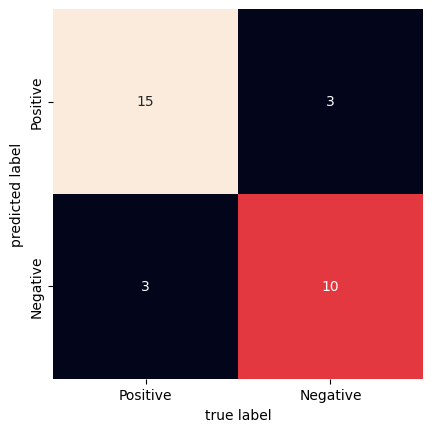

In [15]:
y_pred = log1.predict(X_test)
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.xlabel('true label')
plt.ylabel('predicted label')

## **Support Vector Machine Classifier**

In [16]:
model_linear_1 = SVC(kernel="linear", C=1)
model_linear_1.fit(X_train, y_train)

model_linear_10 = SVC(kernel="linear", C=10)
model_linear_10.fit(X_train, y_train)

model_linear_20 = SVC(kernel="linear", C=20)
model_linear_20.fit(X_train, y_train)

model_radial_1 = SVC(kernel="rbf", C=1)
model_radial_1.fit(X_train, y_train)

model_radial_10 = SVC(kernel="rbf", C=10)
model_radial_10.fit(X_train, y_train)

model_radial_20 = SVC(kernel="rbf", C=20)
model_radial_20.fit(X_train, y_train)

SVC(C=20)

Since we are not able to obtain coefficients in non-linear SVMs, we can observe the shape of the support vectors.

*Note: the initial idea was to observe the values of the vectors themselves, but, due to high population of numbers (i.e. 106x14), differences are not quite distinguishable.*

In [37]:
print('Coefficients SVM linear C=1:\n', model_linear_1.support_vectors_.shape, '\n')
print('Coefficients SVM linear C=10:\n', model_linear_10.support_vectors_.shape, '\n')
print('Coefficients SVM linear C=20:\n', model_linear_20.support_vectors_.shape, '\n')

print('Coefficients SVM rbf C=1:\n', model_radial_1.support_vectors_.shape, '\n')
print('Coefficients SVM rbf C=10:\n', model_radial_10.support_vectors_.shape, '\n')
print('Coefficients SVM rbf C=20:\n', model_radial_20.support_vectors_.shape)

Coefficients SVM linear C=1:
 (106, 14) 

Coefficients SVM linear C=10:
 (102, 14) 

Coefficients SVM linear C=20:
 (95, 14) 

Coefficients SVM rbf C=1:
 (233, 14) 

Coefficients SVM rbf C=10:
 (202, 14) 

Coefficients SVM rbf C=20:
 (199, 14)


In [39]:
print('SVM linear kernel accuracy')
print(model_linear_1.score(X_test, y_test))
print(model_linear_10.score(X_test, y_test))
print(model_linear_20.score(X_test, y_test))
print('\nSVM radial kernel accuracy')
print(model_radial_1.score(X_test, y_test))
print(model_radial_10.score(X_test, y_test))
print(model_radial_20.score(X_test, y_test))

SVM linear kernel accuracy
0.8064516129032258
0.8064516129032258
0.8064516129032258

SVM radial kernel accuracy
0.6451612903225806
0.7096774193548387
0.7741935483870968


Text(113.9222222222222, 0.5, 'predicted label')

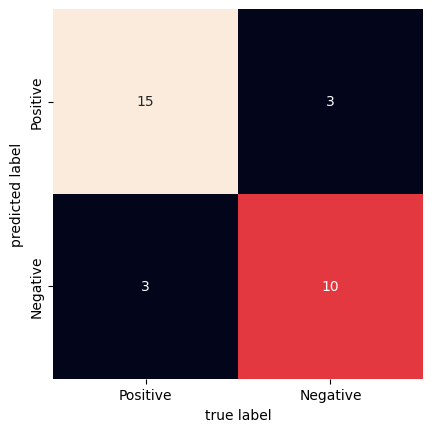

In [19]:
y_pred = model_linear_1.predict(X_test)
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.xlabel('true label')
plt.ylabel('predicted label')

Since the linear kernel models had the same accuracy scores, it seemed reduntant to include the confusion matrix for all of them. Therefore, we will only make one of them and skip to the models with radial kernel.

Text(113.9222222222222, 0.5, 'predicted label')

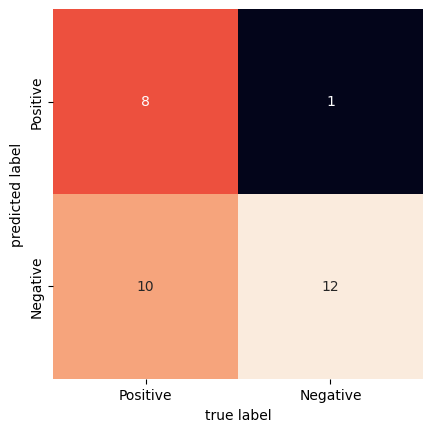

In [20]:
y_pred = model_radial_1.predict(X_test)
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.xlabel('true label')
plt.ylabel('predicted label')

Text(113.9222222222222, 0.5, 'predicted label')

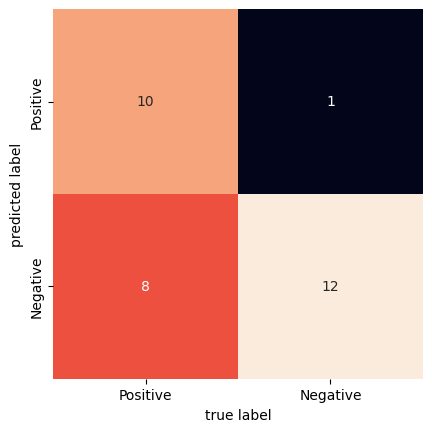

In [21]:
y_pred = model_radial_10.predict(X_test)
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.xlabel('true label')
plt.ylabel('predicted label')

Text(113.9222222222222, 0.5, 'predicted label')

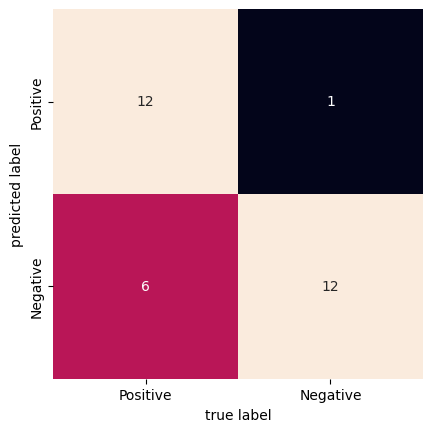

In [22]:
y_pred = model_radial_20.predict(X_test)
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.xlabel('true label')
plt.ylabel('predicted label')

## **Naive Bayes**

In [26]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [27]:
print('Naive Bayes accuracy:\t', nb.score(X_test, y_test))

Naive Bayes accuracy:	 0.8064516129032258


Text(113.9222222222222, 0.5, 'predicted label')

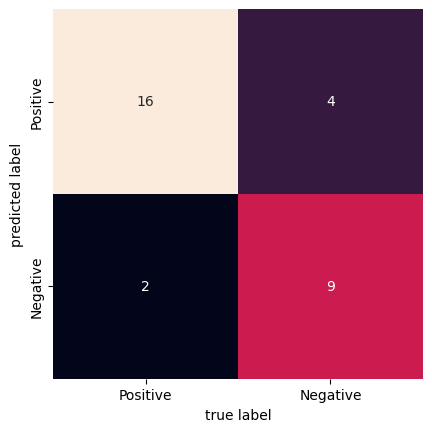

In [28]:
y_pred = nb.predict(X_test)
mat = confusion_matrix(y_test, y_pred)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.xlabel('true label')
plt.ylabel('predicted label')

# **Conclusion**

Most models performed exactly the same, or pretty much the same, regarding accuracy. While experimenting with variations of each model (i.e. softening margin (C) = 1, 10 etc.), we witnessed most variations in this particular metric. Furthermore, a confusion matrix proved also helpful for this task. As an extra measure we printed some information from each model (i.e. coefficients) so that we could keep track of the 'details' when experimenting with variations of each model. The only model that has no further details is Naive Bayes, because it was the only model which was implemented without any variants.

Namely, the models with the exact same percentage of accuracy were:

* Logistic Regression (no special parameters, polynomial, regularised with C=1/5/10)
* Support Vector Machine (only the linear models with C=1/10/20) and
* Naive Bayes

All of them achieved almost 81% (0.8064516129032258). Therefore, the only true variation in accuracy was in SVM that used radial kernel and a) C=1, b)C=10,
c)C=20.

a) had 64.51% (0.6451612903225806),

b) achieved almost 71% (0.7096774193548387) and

c) 77.41% (0.7741935483870968) accuracy.

The last results were sort of expected comparing to each other since in scikit larger values of C (i.e. 20) make a more 'strict' model than lower ones (C=1), which is the exact opposite of the theory. Therefore, in this context, a more strict approach is preffered.

While noticing the accuracy results of this notebook, you can observe a variation in Logistic Regression with Polynomial Features (0.8709677419354839). That was due to change in max_iter argument, an extra parameter tested, due to convergence warnings when training the models. While the rest of the models stayed the same (and SVC doesn't accept such argument without further modifications) we can observe that the actual best accuracy results were achieved with the polynomial features, which was quite expected, knowing that we 'enabled' the model to 'find' the appropriate hyperplane. However, since this was not an official parameter examined in this coursework, we will not discuss this any further *(this parameter was only included in the Logistic Regression models)*.

Nevertheless, most models achieved the best accuracy results, ~80% (given the parameters specified), meaning that a radial SVM is not the optimal model for our data.

Accuracy results can be also verified from the confusion matrix results (which were also exactly the same). Confusion Matrix helped visualising the type of mismatch of data (i.e. population of False Positives, False Negatives etc). Therefore, we can conclude our results with the statements below:

Our data followed the split requested (90%-10%) and had a certain random_state. Comparing our results with the ones from our first coursework, we know that a variation in accuracy could have been observed if there was a different split size (which was not encouraged to do) and/or a different shuffling (random state), since the output data (y) had only two possible values (binary - 0 or 1).

Having only two possible output values and with this split of data, shuffling plays an important role for this task. For example, we might have too many zeros or too many ones inside the y_train and same goes for y_test, leaving room for phenomena such as leakage of data or overfitting.